<a href="https://colab.research.google.com/github/KIMHYOENJUN/AI_project/blob/main/YOLOv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/yolov3_dataset/yolov3_dataset

/content/drive/MyDrive/yolov3_dataset/yolov3_dataset


In [ ]:
import os
import sys
import cv2
import numpy as np
from glob import glob

In [ ]:
class preprocessing:
    def __init__(self, resize_size):
        self.resize_size = resize_size
    
    def resize(self, img):
        resize_img = cv2.resize(img, (self.resize_size, self.resize_size))
        return resize_img
    
    def normalize_img(self, img):
        norm_img = img / 255.0
        return norm_img

In [ ]:
datapath = './train_zip/train'
img_list = glob(os.path.join(datapath, '*.jpg'))
annot_list = glob(os.path.join(datapath, '*.xml'))
prepro_img = preprocessing(resize_size=244)

for file in img_list:
    print(file)
    img = cv2.imread(file)
    resize_img = prepro_img.resize(img)
    norm_img = prepro_img.normalize_img(resize_img)

./train_zip/train/banana_2.jpg
./train_zip/train/apple_8.jpg
./train_zip/train/banana_22.jpg
./train_zip/train/apple_4.jpg
./train_zip/train/apple_73.jpg
./train_zip/train/banana_71.jpg
./train_zip/train/apple_67.jpg
./train_zip/train/apple_50.jpg
./train_zip/train/banana_41.jpg
./train_zip/train/banana_13.jpg
./train_zip/train/banana_28.jpg
./train_zip/train/apple_20.jpg
./train_zip/train/banana_17.jpg
./train_zip/train/banana_46.jpg
./train_zip/train/apple_48.jpg
./train_zip/train/apple_9.jpg
./train_zip/train/apple_23.jpg
./train_zip/train/apple_72.jpg
./train_zip/train/apple_16.jpg
./train_zip/train/apple_57.jpg
./train_zip/train/apple_42.jpg
./train_zip/train/apple_64.jpg
./train_zip/train/banana_65.jpg
./train_zip/train/apple_22.jpg
./train_zip/train/apple_7.jpg
./train_zip/train/apple_3.jpg
./train_zip/train/banana_54.jpg
./train_zip/train/banana_26.jpg
./train_zip/train/banana_76.jpg
./train_zip/train/apple_31.jpg
./train_zip/train/banana_59.jpg
./train_zip/train/apple_58.jpg
.

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

In [ ]:
print(len(img_list))
print(len(annot_list))

240
240


In [ ]:
img_list.sort(reverse=True)
annot_list.sort(reverse=True)

In [ ]:
print(img_list[:10])
print(annot_list[:10])

['./train_zip/train/orange_9.jpg', './train_zip/train/orange_8.jpg', './train_zip/train/orange_76.jpg', './train_zip/train/orange_75.jpg', './train_zip/train/orange_74.jpg', './train_zip/train/orange_73.jpg', './train_zip/train/orange_72.jpg', './train_zip/train/orange_71.jpg', './train_zip/train/orange_70.jpg', './train_zip/train/orange_7.jpg']
['./train_zip/train/orange_9.xml', './train_zip/train/orange_8.xml', './train_zip/train/orange_76.xml', './train_zip/train/orange_75.xml', './train_zip/train/orange_74.xml', './train_zip/train/orange_73.xml', './train_zip/train/orange_72.xml', './train_zip/train/orange_71.xml', './train_zip/train/orange_70.xml', './train_zip/train/orange_7.xml']


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from bs4 import BeautifulSoup

def generate_box(obj):
    
    xmin = float(obj.find('xmin').text)
    ymin = float(obj.find('ymin').text)
    xmax = float(obj.find('xmax').text)
    ymax = float(obj.find('ymax').text)
    
    return [xmin, ymin, xmax, ymax]

def generate_label(obj):
    if obj.find('name').text == "with_mask":
        return 1
    elif obj.find('name').text == "mask_weared_incorrect":
        return 2
    return 0

def generate_target(file): 
    with open(file) as f:
        data = f.read()
        soup = BeautifulSoup(data, "html.parser")
        objects = soup.find_all("object")

        num_objs = len(objects)

        boxes = []
        labels = []
        for i in objects:
            boxes.append(generate_box(i))
            labels.append(generate_label(i))
        
        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        
        return target

def plot_image(img_path, annotation):
    
    img = mpimg.imread(img_path)
    
    fig,ax = plt.subplots(1)
    ax.imshow(img)

    
    for idx in range(len(annotation["boxes"])):
        xmin, ymin, xmax, ymax = annotation["boxes"][idx]

        if annotation['labels'][idx] == 0 :
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='r',facecolor='none')
        
        elif annotation['labels'][idx] == 1 :
            
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='g',facecolor='none')
            
        else :
        
            rect = patches.Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),linewidth=1,edgecolor='orange',facecolor='none')

        ax.add_patch(rect)

    plt.show()

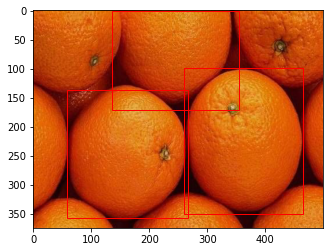

In [ ]:
import random

a = random.randrange(0, 239)

bbox = generate_target(annot_list[a])
plot_image(img_list[a], bbox)